Welcome to you for the best kernel of this competition. Coded by me Sémi Ben Hsan (SBH) .Freelance Machine Learning Engineer. This kernel includes all the advanced techniques of Time Series Forecasting , programmed in a professional way ( The SBH style ) and explained in detail . I AM WAITING FOR YOUR VOTES , opinions and comments ... The strength of this work is that it is generic and can be extended for any Time Series problem Also these codes are original and do not exist in any github repo / Kaggle notebook / blog . on the internet . They are totally produced by the author with the help of God and his own creativity. So If you use parts of this notebook in your scripts/notebooks, giving some kind of credit would be very much appreciated :) You can for instance link back to this notebook. Thanks!



0. Downloading Datasets
1. Imports & Install 
2. EDA
3. Auto Arima
4. Prophet
5. LSTM
6. DeepAR
7. Isolation forest for Anomaly Detection 
8. Auto Encoder for Anomaly Detection
9. AutoML 
10. Reinforcement Learning Approches
11. Classic Machine learning Approches

	11.1 Utils

	11.2 Filling_Nans

	11.3 Preprocess

	11.4  GridSearchCV

	11.5 Optuna Framework

	11.6 KFold
  
12.Graph Neural Networks

13. Apach Spark


In order to give the readers a variation in the data set and at the same time give them a useful source of time series datasets. For the different approaches we will use different data sets depending on what the author sees fit. Enjoy your reading .. 

0. Downloading Dataset

In [ ]:
!pip install download
!pip install fbprophet
from download import download
import pandas as pd
path = download('https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip', '/tmp/aq', kind="zip")

convert_to_date(x) : Function that takes a list of columns 
hour , minute , day , year and concatenate them into a single column this function will be passed as an argument to pd.read_csv( )(date_parser=convert_to_date) 
parse_dates = [['year', 'month', 'day', 'hour']] will be the list of columns passed as argument for convert_to_date .. An automatic column with the name 'year_month_day_hour' will be added to the data set

In [ ]:
from datetime import datetime
def convert_to_date(x): 
	return datetime.strptime(x, '%Y %m %d %H')

In [ ]:
df = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv', parse_dates = [['year', 'month', 'day', 'hour']],date_parser=convert_to_date, keep_date_col=True)

In [ ]:
df.head()

In [ ]:
df_holi = pd.read_csv('../input/store-sales-time-series-forecasting/holidays_events.csv')
df_oil = pd.read_csv('../input/store-sales-time-series-forecasting/oil.csv')
df_stores = pd.read_csv('../input/store-sales-time-series-forecasting/stores.csv')
df_trans = pd.read_csv('../input/store-sales-time-series-forecasting/transactions.csv')

df_train = pd.read_csv('../input/store-sales-time-series-forecasting/train.csv')
df_test = pd.read_csv('../input/store-sales-time-series-forecasting/test.csv')

1. IMPORTS

Here there is nothing special an import block for all the frameworks that will accompany us in this notebook 

In [ ]:
#!pip install --upgrade mxnet-cu101==1.6.0.post0
# !pip install --upgrade mxnet==1.6.0
!pip install gluonts

In [ ]:
%matplotlib inline
import plotly.express as px
import seaborn as sns
import pandas_profiling
import statsmodels.api as sm
import statsmodels.tsa.stattools as sm
from statsmodels.tsa.stattools import kpss ,  adfuller
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import gluonts
from gluonts.dataset.common import ListDataset
from gluonts.evaluation.backtest import make_evaluation_predictions
from gluonts.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer
import matplotlib.pyplot  as plt
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
import numpy as np
from fbprophet.plot import add_changepoints_to_plot
# from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
!pip3 install auto-ts
!pip install tscv
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import plotly.express as px
# from auto_ts import auto_timeseries

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [ ]:
# Gym stuff
# !pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym
# import gym
# import gym_anytrading
# # Stable baselines - rl stuff
# # from stable_baselines.common.vec_env import DummyVecEnv
# from stable_baselines import A2C

2. EDA

Class EDA : 

Will be useful for everything related to Time Series exploration. Here you will find all the functions you will need which are divided into 9 parts 

   Part 1 : constructor : the class constructor

   Part 2 : Solving Time Series problems : Everything about missing and duplicated values 

   Part 3 : Stats on the Time Serie : Stats of all types offered by pandas and pandas_profiling

   Part 4: Before plotting functions : Processing utilities to adapt the dataset to the plotting framework

   Part 5 : Plotting : Different plots offered here . In order to better visualize statically our data set 

   Part 6 : Correlations : To study the correlation between the different features of the data set and the outliers 

   Part 7 : Seasonality Tests : Hypothesis tests to check if the time series is stationary 

   Part 8 : TS Decomposition : Containing useful functions to decompose the Time Series into different components 

   Part 9 : Other Functions : Containing useful functions to make different calculations 


eda = EDA(df) : The Constructor of the class .. Only take the data frame df that you want 

eda.duplicate_values() :     Eliminate the duplicated values from the data frame 

eda.duplicate_indices() :Check whether the indices have any duplicates : return DataFrame

eda.missing_values_df() : Checks missing values :return DataFrame

eda.missing_values_columns() : Check whether there is missing value in a given column 

eda.fill_na() : There will be a bunch of different methods .. like .fillna(''ffill'')  etc ... So will make it empty for now 
bcz it will be based on the nature of the problem 

eda.summary() :   Return summary/describe of DataFrame :return DataFrame

eda.pandas_profiling() :  There summary stats with pandas profiling framework

eda.column_convert() : Convert string column to numerical one

eda.set_index (column) : This will serve to set column as  index it is very useful for many frameworks in order to get some plots

eda.plot_column(column)  :This will be useful to plot a particular column in the data set

eda.express_plot (x_column,y_column,title) : This will serve to make a plot of y_columns with respect to x_column with plotly.express

eda.lag_plot(column,lag) : This will serve to plot T(t) with respect to T(t+lag) of a given column 

eda.pair_plot(columns) : This will serve to plot the correlation between several columns 

eda.autocorrelation_plot(column): Autocorrelation plot for time series. The horizontal lines in the plot correspond to 95% and 99% confidence bands. The dashed line is 99% confidence band.

eda.corr_heatmap(): This will serve to plot the correlation matrix between the features of the data set 

eda.outliers(column) : This will help extract the outliers from a column 

eda.kpss_test(column) : Perform the Kpss test in order the know if the serie is stationnary or not 

eda.adfuller_test(column) : Perform the adfuller test in order the know if the serie is stationnary or not 

eda.plot_time_series_seasonal_decomp(column, model='additive') : This will perform TS decompostion into different compononts 

eda.plot_composants(column,res) :This will help to plot to plot the several compononts of TS 

eliminate_composant (res,composant) : This will eliminate the componont you want from the time serie 

eda.resampling(freq): This will help to sample some observation with a fixed frequency 

eda.difference(freq) : Every observation will get its current value minus the observation situated by freq lines before it

eda.shifting(freq) : Every datetime will be shifted by a frequency freq

eda.rolling(window) :  Make some operations on data frame .sum() .medium() etc ... 

eda.group(freq) : Make some grouppement operations on the data frame 

eda.cummulative_sum(column) : Calculate the cummulative_sum on a column 

eda.pourcentage_change(column,freq) : Calculate the pourcentage change between two obsevations distant with freq lines 

In [ ]:
class EDA():
  # Part 1 : constructor
  def __init__(self, df): 

    '''
    The Constructor of the class .. Only take the data frame df that you want 

    '''

    self.df = df
    
  # Part 2 : Solving Time Series problems
  def duplicate_values(self): 

    ''' 
    Eliminate the duplicated values from the data frame 

    '''
    duplicates = self.df[self.df.duplicated(subset=None, keep='first')==True]
    print("Duplicate values data")
    return duplicates

   # Part 3 : Stats on the Time Serie
  def duplicate_indices(self): 
        '''
        Check whether the indices have any duplicates
        
        :return DataFrame

        '''        
        duplicate_indices = self.df[self.df.index.duplicated()==True]
        
        print("Duplicate indices")
        
        return duplicate_indices
   
   
  def missing_values_df(self):

        """
        Checks missing values
        
        :return DataFrame
        
        """
        missing = self.df[self.df.isna().any(axis=1)]
        
        print("Missing values data")
        
        return missing

  def missing_values_columns (self,column) : 

    """check whether there is missing value in a given column"""

    missing = self.df.query(column + ' != ' + column ) 
    print ('Missing value in ', column)
    return missing

  def fill_na(self) : 

    """There will be a bunch of different methods .. like .fillna(''ffill'')  etc ... So will make it empty for now 
    bcz it will be based on the nature of the problem """

    pass 
 
  # Part 4: Before plotting functions 
  def summary(self): 

        """
        Return summary/describe of DataFrame
        
        :return DataFrame
        """       
        summary = self.df.reset_index().describe(include='all').transpose()
        
        print("Summary metrics")
        
        return summary

  def pandas_profiling(self):

    """There summary stats with pandas profiling framework"""

    self.df.profile_report(style={'full_width':True})  

  # Partie 4 : Before plotting 

  def column_convert(self,column) : 

    """ Convert string column to numerical one """

    self.df[column]=pd.to_numeric(self.df[column])

  def set_index (self,column) :

    """This will serve to set column as  index it is very useful for many frameworks in order to get some plots"""

    self.df = self.df.set_index(column)
    

  # Partie 5 : Plotting 
  def plot_column (self,column) : 

    """This will be useful to plot a particular column in the data set"""

    self.df[column].plot(grid=True) 
    plt.show()

  def express_plot (self,x_column,y_column,title): 

    """ 
    This will serve to make a plot of y_columns with respect to x_column with plotly.express 

    """
    fig = px.line(self.df, x=x_column, y=y_column, title=title)
    fig.update_xaxes(
        rangeslider_visible=True,
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(count=2, label="2y", step="year", stepmode="backward"),
                dict(count=3, label="3y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        )
    )
    fig.show()
  def lag_plot (self,column,lag) :

    """ 
    This will serve to plot T(t) with respect to T(t+lag) of a given column 
    """
    pd.plotting.lag_plot(self.df[column],lag=lag)
  def pair_plot (self,columns) :  

    """ 
    This will serve to plot the correlation between several columns 

    """

    return sns.pairplot(self.df[columns])
  def autocorrelation_plot (self,column) : 

    """ 
    Autocorrelation plot for time series.

    The horizontal lines in the plot correspond to 95% and 99% confidence bands.

    The dashed line is 99% confidence band.
    """

    return pd.plotting.autocorrelation_plot(self.df[column])

  # Partie 6 : Correlations 
  def corr_heatmap(self):

    """ 
    This will serve to plot the correlation matrix between the features of the data set 
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    corr = self.df.corr()
    hm = sns.heatmap(round(corr,2), annot=True, cmap="coolwarm",fmt='.2f', linewidths=.05)
    fig.subplots_adjust(top=0.93)
    title = fig.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)
    return plt.show() 

  def outliers(self, column):

        ''' 
        Checks outliers - anything outside of 5% to 95% quartile range
        
        :param col : str
            Name of col to be tested
            
        :return DataFrame
        '''
        outliers = self.df[~self.df[column].between(self.df[column].quantile(.05), self.df[column].quantile(.95))]
        
        print("Outliers")
        
        return outliers

  # Partie 7 : Seasonality Tests 
     
  def kpss_test(self,column,regression = 'c'):   

    """
    Perform the Kpss test in order the know if the serie is stationnary or not 
    """
    stats, p, lags, critical_values = kpss(self.df[column], regression = regression)
    print(f'Test Statistics: {stats}')
    print(f'Test Statistics: {stats}')
    print(f'p-value: {p}')
    print(f'Critial Values: {critical_values}')
    if p < 0.05 :
      print('Series is not Stationary') 
    else:
      print('Series is Stationary')
  def adfuller_test (self,column) : 

    """ 
     Perform the adfuller test in order the know if the serie is stationnary or not 

     """
    result = adfuller(self.df[column])
    print(f'Test Statistics: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critial Values: {result[4]}')
    if result[1] > 0.05 :
      print('Series is not Stationary')
    else:
      print('Series is Stationary')
  

  # Partie 8 : TS Decomposition
  def plot_time_series_seasonal_decomp(self,column, model='additive'):

    """
     This will perform TS decompostion into different compononts 
     """

    res = sm.tsa.seasonal_decompose(self.df[column],model=model)
    resplot = res.plot()
    return res 
  def plot_composants (self,column,res) : 

    """ 
    This will help to plot to plot the several compononts of TS 
    """
    plt.figure(figsize=(22,7))
    plt.title('Trend plot')
    res.trend.plot()
    plt.figure(figsize=(22,7))
    plt.title('Residual plot')
    res.resid.plot()
    plt.figure(figsize=(22,7))
    plt.title('Seasonal plot')
    res.seasonal.plot()
  def eliminate_composant (self,res,composant) :  

    """ 
    This will eliminate the componont you want from the time serie 
    """
    if composant == 'trend' : 
      pd.DataFrame(res.observed/res.trend).plot()
    elif composant == 'resid' : 
      pd.DataFrame(res.observed/res.resid).plot()
    elif composant == 'seasonal' : 
      pd.DataFrame(res.observed/res.seasonal).plot()
    else : 
      print ("error")
  # Partie 9 : Other Functions 
  def resampling(self,freq) : 

    """ 
    This will help to sample some observation with a fixed frequency 
    """
    return self.df.resample(freq).mean() 
  def difference (self,freq,column) : 

    """
    Every observation will get its current value minus the observation situated by freq lines before it 

    """
    return self.df[column].diff(freq)

  def shifting (self,freq) :  

    """
    This will shift the observations by a frequency freq 
    """ 

    return self.df.shift(freq)
  def tshifting (self,freq) : 

    """ 
        This will shift the dates by a frequency freq 
    """

    return self.df.tshift(2)

  def rolling (self,window) : 

    """ 
    Make some operations on data frame .sum() .medium() etc ... 
    """ 
    return self.df.rolling(window=window).sum() 
  def group (self,freq) : 

    if freq == "weekly" : 
      return self.df.groupby(self.df.index.dayofweek).mean() 
    elif freq == "monthly" : 
      return self.df.groupby(self.df.index.month).mean()  
    elif freq == "yearly" : 
      return self.df.groupby(self.df.index.year).mean()  
    else : 
      print ("eurror")

  def cummulative_sum (self,column) :

    """ 
    Calculate the cummulative_sum on a column 
    """
    return pd.DataFrame(self.df[column].cumsum()) 
  def pourcentage_change (self,column,freq) :  
    
    """ 
     Calculate the pourcentage change between two obsevations distant with freq lines
     """
    return self.df[column].pct_change(freq)  

In [ ]:
eda = EDA(df)
eda.df.fillna(5,inplace=True) # Fill with whatever you want .. here just a demonstration


In [ ]:
eda.duplicate_values()


In [ ]:
eda.duplicate_indices()


In [ ]:
eda.missing_values_df() 


In [ ]:
eda.missing_values_columns('PM10') 


In [ ]:
eda.summary()


In [ ]:
# eda.pandas_profiling() # pb pandas pb_profilling 


In [ ]:
eda.column_convert('month')


In [ ]:
eda.set_index ('year_month_day_hour')

In [ ]:
eda.plot_column('PM10')  # index should be date


In [ ]:
eda.express_plot ('day','PRES','PRES with respect of year_month_day_hour') # column should be existed


In [ ]:
eda.lag_plot('PRES',2) 


In [ ]:
eda.pair_plot(df.columns[3:6]) 


In [ ]:
eda.autocorrelation_plot('PM10') 


In [ ]:
eda.corr_heatmap() 


In [ ]:
eda.outliers('month')


In [ ]:
eda.kpss_test('PM10') 


In [ ]:
eda.adfuller_test('month')


In [ ]:
import statsmodels.api as sm
res = eda.plot_time_series_seasonal_decomp('month', model='additive')  # index should be date


In [ ]:
eda.plot_composants('month',res) 


In [ ]:
eda.eliminate_composant (res,'trend')


In [ ]:
eda.resampling('M') # index should be date


In [ ]:
eda.difference(1,'PM2.5')


In [ ]:
eda.shifting(2)


In [ ]:
eda.tshifting(2)


In [ ]:
eda.rolling(5)


In [ ]:
eda.group ("weekly")


In [ ]:
eda.cummulative_sum ('PM10') 


In [ ]:
eda.pourcentage_change ('PM2.5',2)  

3. Modeling 

3.1 Auto Arima

The conventional ARIMA model assumes that the historical data are useful to predict the value at the next time step. In this case, this is somewhat true, as the ACF plot before showed past value is somewhat correlated with today's value.

ARIMA basically integrates two naive forecasting techniques together:

Autoregression - Uses one or more past values to forecast the future. The number of values used is known as the 'order' (e.g. order 2 means yesterday and day before's value is used)

Integrating - the part that reduces seasonality. How many degrees of differencing is done to reduce seasonality is the 'order'.

Moving Average - Uses the Moving Average of the historical data to adjust the forecasted values. This has a 'smoothing' effect on the past data, as it uses the moving average rather than the actual values of the past. The number of days in the moving average window is the 'order'

Here a demonstration on how to Use Arima on the dataset below that we will consider 

In [ ]:
!pip install pmdarima
# import pmdarima as pm

# The data to consider : 
df = df[['year_month_day_hour','PM10']]
df['PM10'] = df['PM10'].astype('float64')
df['PM10'].fillna(method = 'ffill',inplace=True)
df = df.set_index('year_month_day_hour')

__init__ : Constructor of the class 

arima_model(target) : define the arima model that we will use

data_split(condition_1,condition_2) : it will serve to split the data into train and test based on two conditions 

arima_fit : fitting the arima model 

predict : predicting the future with the fitted model

df_predict : return the predicted values  in one dataframe

prediction_plot : plotting the predictions







In [ ]:
class Auto_Arima () : 

  def __init__ (self,df) : 

    """ 
    Constructor of the class

    """
    self.df = df
  def arima_model (self,target) :

    """
    Define the arima model that we will use

    """
    self.model = pm.auto_arima(self.df[target], 
                            m=1, seasonal=True,
                          start_p=0, start_q=0, max_order=1, test='adf',error_action='ignore',  
                              suppress_warnings=True,
                          stepwise=True, trace=True)
    
  def data_split (self,condition_1,condition_2) : 

    """ 
    This function will serve to split the data into train and test based on two conditions
    
    """ 
    self.train=self.df[(self.df.index >= condition_1) & (self.df.index <= condition_2)]
    self.test=self.df[(self.df.index > condition_2)]    

  def arima_fit (self,target) : 

    """
    Fitting the arima model
    
    """
    self.model.fit(self.train[target])

  def predict (self) : 

    """ 
    predicting the future with the fitted model

    """
    self.forecast=self.model.predict(n_periods=self.test.shape[0], return_conf_int=True)

  def df_predict(self) : 

    """

    return the predicted values in one dataframe

    """
    self.forecast_df = pd.DataFrame(self.forecast[0],index = self.test.index,columns=['Predictions'])

  def prediction_plot (self,target) : 

    """
     plotting the predictions
     
     """
    pd.concat([self.df[target],self.forecast_df],axis=1).plot()


In [ ]:
df = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv', parse_dates = [['year', 'month', 'day', 'hour']],date_parser=convert_to_date, keep_date_col=True)
auto_arima = Auto_Arima(df)
# auto_arima.arima_model('PM10')
# auto_arima.data_split('2013-03-01 00:00:00','2016-03-01 00:00:00')
# auto_arima.arima_fit('PM10')
# auto_arima.predict (8759) # test.shape[0] shld be equal to  n_periods 
# auto_arima.df_predict()
# auto_arima.prediction_plot('PM10')

3.2 Prophet

Prophet follows the sklearn model API. We create an instance of the Prophet class and then call its fit and predict methods.

The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

Here we perform a demonstration on eda.df as a dataframe : 

__init__(self,df) : Constructor of the class 

 prepare_data (self,timestamp,target) : function to prepare the data as 'ds' and  'y' columns in order to pass them to prophet model

 data_split (self,start_index,end_index) : function to split the data into train and test based on start and end indexes 

 prophet_model (self,yearly_seasonality) : function to define the profet object model 

 fit (self) : function to fit the model 

 prepare_future (self,periods) : function to prepare the periods of the future 

 predict(self) : function to predict the future 

 plot_prediction_label (self) : function to plot the label and the prediction 

 plot_prediction(self) : A function to plot the predictions 

plot_components(self) : A function to plot the different compononts .. trend .. weekly seasonality .. yearly seasonality 

add_change_points (self) : A function serving to add change points to the plots 

plot_change_points (self) : A function serve to plot change points on 80/100 of the train data 

plot(self) : Plotting the forecast with plotly framework

cross_val (self,initial,horizon) : A function to perform cross validation and get results 

performance_metric (self) : A function to get the performance of the prophet model 



In [ ]:
class Prophet_Modeling () : 
  def __init__(self,df) : 
    self.df = df 
  def prepare_data (self,timestamp,target) : 
    self.df=self.df[[timestamp,target]].rename({timestamp:'ds',target:'y'}, axis='columns')

  def data_split (self,start_index,end_index) : 
    self.train=self.df[(self.df['ds'] >= start_index) & (self.df['ds'] <=end_index)]
    self.test=self.df[(self.df['ds'] > end_index)]
  def prophet_model (self,yearly_seasonality) :
    self.model = Prophet(interval_width=0.8,yearly_seasonality=yearly_seasonality)
  def fit (self) : 
    self.model.fit(self.train)
  def prepare_future (self,periods) : 
    self.future = self.model.make_future_dataframe(periods=periods) # test.shape[0] = 104
  def predict(self) : 
    self.forecast = self.model.predict(self.future)
  def plot_prediction_label (self) : 
    pd.concat([self.df.set_index('ds')['y'],self.forecast.set_index('ds')['yhat']],axis=1).plot()
  def plot_prediction (self) : 
    fig1 = self.model.plot(self.forecast)
  def plot_components(self) : 
    fig2 = self.model.plot_components(self.forecast)
  def add_change_points (self) : 
    fig = self.model.plot(self.forecast)
    a = add_changepoints_to_plot(fig.gca(), self.model, self.forecast)
  def plot_change_points (self) : 
    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111)
    ax.bar(range(len(self.model.params['delta'].mean(0))), self.model.params['delta'].mean(0))
    ax.grid(True, which='major', c='red', ls='-', lw=1, alpha=0.2)
    ax.set_ylabel('Rate change')
    ax.set_xlabel('changepoint')
    fig.tight_layout()
  def plot(self) : 
    from fbprophet.plot import plot_plotly
    import plotly.offline as py
    fig = plot_plotly(self.model, self.forecast) 
    py.iplot(fig)
  def cross_val (self,initial,horizon) : 
    self.cv_results = cross_validation( model = self.model, initial =initial, horizon = horizon)
  def performance_metric (self) : 
    self.df_p = performance_metrics(self.cv_results)


In [ ]:
# The data to consider : 
df = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv', parse_dates = [['year', 'month', 'day', 'hour']],date_parser=convert_to_date, keep_date_col=True)
df = df[['year_month_day_hour','PM10']]
df['PM10'] = df['PM10'].astype('float64')
df['PM10'].fillna(method = 'ffill',inplace=True)

In [ ]:
prophet = Prophet_Modeling(df)


In [ ]:
prophet.prepare_data('year_month_day_hour','PM10')


In [ ]:
prophet.data_split('2013-03-01 00:00:00','2016-05-30 00:00:00	')


In [ ]:
prophet.prophet_model(yearly_seasonality=True)


In [ ]:
prophet.fit()


In [ ]:
prophet.prepare_future(prophet.test.shape[0]) #104


In [ ]:
prophet.predict()


In [ ]:
prophet.plot_prediction_label()


In [ ]:
prophet.plot_prediction()


In [ ]:
prophet.plot_components()


In [ ]:
prophet.add_change_points()


In [ ]:
prophet.plot_change_points()


In [ ]:
prophet.plot()


In [ ]:
prophet.cross_val('731 days','365 days')
prophet.performance_metric()

3.3 LSTM

Time series prediction problems are a difficult type of predictive modeling problem.

Unlike regression predictive modeling, time series also adds the complexity of a sequence dependence among the input variables.

A powerful type of neural network designed to handle sequence dependence is called recurrent neural networks. The Long Short-Term Memory network or LSTM network is a type of recurrent neural network used in deep learning because very large architectures can be successfully trained.

LSTM can be used for : 
-  univariate time series forecasting. 
- multivariate time series forecasting 
- multi-step time series forecasting

In our case I will explain the use of LSTM in Univariate Time Series Forecasting . Please let me know in the comments if you want codes / Explanations for multivariate Time Series Forecasting 

In [ ]:
class CFG :
  win_length=720 
  num_features = 4 
  sampling_rate = 1 
  batch_size=32
  scaler = MinMaxScaler()
  input_shape= (win_length, num_features)
  lstm_neurons = 32
  alpha = 0.5 
  dropout = 0.3

__init__(self,df) : Constructor of the class

scaling(self) : in order to scale the data 

data_prepare(self) : function to prepare features + target

data_split (self) : function to split data into train + test 

sequences_prepare (self) : Function to prepare sequences train and test data . I recommend to check the documentation of TimeSeriesGenerator in order to get understand more the functionning of this function

inverse_scaling (self,predictions) : WARNING !!! Don't forget to inverse the scale of the features 

final_df(self,predictions,rev_trans) : function to prepare the final_df 


In [ ]:
class LSTM_DATA_PREPARE () :
  def __init__(self,df) : 
    self.df = df
  def scaling (self) : 
    self.df_scaled = CFG.scaler.fit_transform(self.df)
  def data_prepare (self) : 
    self.features=self.df_scaled
    self.target=self.df_scaled[:,0]
  def data_split (self) : 
    self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.features, 
          self.target, test_size=0.20, random_state=123, shuffle = False)
  def sequences_prepare (self) : 
      self.train_generator = TimeseriesGenerator(self.x_train, self.y_train, length=CFG.win_length, sampling_rate=CFG.sampling_rate, batch_size=CFG.batch_size)
      self.test_generator = TimeseriesGenerator(self.x_test, self.y_test, length=CFG.win_length, sampling_rate=CFG.sampling_rate, batch_size=CFG.batch_size)
  def inverse_scaling (self,predictions) : 
    df_pred=pd.concat([pd.DataFrame(predictions), pd.DataFrame(self.x_test[:,1:][CFG.win_length:])],axis=1)
    rev_trans=CFG.scaler.inverse_transform(df_pred) # 3léh inversion tsir kén 3al df_pred 3al predictions khw mayakfich 
    return rev_trans
  def final_df (self,predictions,rev_trans) : 
    df_final=self.df[predictions.shape[0]*-1:]
    df_final['Pred']=rev_trans[:,0]
    return df_final
    

In [ ]:
# The data to consider 
df = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv', parse_dates = [['year', 'month', 'day', 'hour']],date_parser=convert_to_date, keep_date_col=True)
df1 = df[['PM2.5','O3','TEMP','PRES']].fillna(5) # choisir data que vous voulez ......


In [ ]:
data = LSTM_DATA_PREPARE(df1)
data.scaling()
data.data_prepare()
data.data_split()
# data.sequences_prepare()
# data.train_generator + data.test_generator : da5lét eda.df[colonnes choisis] 5arjét hal zouz fihom les séquences 

Here just as an exmple of 3 layers of LSTM .. feel free to choose the model you want .. and the hyperparams you want .. This model is coded with the subclassing Tensorflow method . All the codes should be in a class ( at least a function ) to get a clean code 

In [ ]:

class LSTM_MODEL (tf.keras.Model) : 
  def __init__(self):
    super(LSTM_MODEL, self).__init__()
    self.lstm1 = layers.LSTM(CFG.lstm_neurons*4, input_shape= CFG.input_shape, return_sequences=True)
    self.lstm2 = layers.LSTM(CFG.lstm_neurons*2, return_sequences=True)
    self.lstm3 = layers.LSTM(CFG.lstm_neurons, return_sequences=False)
    self.activation = layers.LeakyReLU(alpha=CFG.alpha)
    self.dropout = layers.Dropout(CFG.dropout)
    self.dense = layers.Dense(1) 
  def call (self,inputs) : 
    x = self.dropout(self.activation(self.lstm1(inputs)))
    x = self.dropout(self.activation(self.lstm2(x)))
    x = self.dense((self.activation(self.lstm3(x))))
    return x

In [ ]:
# model = LSTM_MODEL()
# model.compile(loss=tf.losses.MeanSquaredError(),
#               optimizer=tf.optimizers.Adam(),
#               metrics=[tf.metrics.MeanAbsoluteError()])
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
#                                                     patience=2,
#                                                     mode='min')
# history = model.fit(data.train_generator, epochs=1,validation_data=data.test_generator,shuffle=False
#                               ,callbacks=[early_stopping],verbose=1) 
# predictions=model.predict(data.test_generator)
# # data.y_test , predictions 
# # ATTENTIONNNNNNNNNNNN : y_test w predictions hna mayét9arnouch les prédictions sarou 3la data scaled .. donc lezmk ta3ml opération
# # inverse pour pouvoir comparer .. predictions w l y_test

In [ ]:
# rev_trans = data.inverse_scaling (predictions)
# final_df = data.final_df(predictions,rev_trans)

In [ ]:
# final_df

4. DeepAR

The Amazon SageMaker DeepAR forecasting algorithm is a supervised learning algorithm for forecasting scalar (one-dimensional) time series using recurrent neural networks (RNN). Classical forecasting methods, such as autoregressive integrated moving average (ARIMA) or exponential smoothing (ETS), fit a single model to each individual time series. They then use that model to extrapolate the time series into the future.

In many applications, however, you have many similar time series across a set of cross-sectional units. For example, you might have time series groupings for demand for different products, server loads, and requests for webpages. For this type of application, you can benefit from training a single model jointly over all of the time series. DeepAR takes this approach. When your dataset contains hundreds of related time series, DeepAR outperforms the standard ARIMA and ETS methods. You can also use the trained model to generate forecasts for new time series that are similar to the ones it has been trained on.

The training input for the DeepAR algorithm is one or, preferably, more target time series that have been generated by the same process or similar processes. Based on this input dataset, the algorithm trains a model that learns an approximation of this process/processes and uses it to predict how the target time series evolves. Each target time series can be optionally associated with a vector of static (time-independent) categorical features provided by the cat field and a vector of dynamic (time-dependent) time series provided by the dynamic_feat field. SageMaker trains the DeepAR model by randomly sampling training examples from each target time series in the training dataset. Each training example consists of a pair of adjacent context and prediction windows with fixed predefined lengths. To control how far in the past the network can see, use the context_length hyperparameter. To control how far in the future predictions can be made, use the prediction_length hyperparameter. For more information, see How the DeepAR Algorithm Works.

__init__ (self,df) : the constructor of the class 

prepare_train (self,start_index,target_index,target,freq) : To prepare the train data from a start_index and target index 

prepare_test (self,start_index,target_index,target,freq) : prepare the test from a start index to a target_index

estimator (self,freq,context_length,prediction_length,num_layers,num_cells,cell_type,epochs) : In order to fix the architecture of the estimator .. num_layers , cell_type etc ... 

train(self) : to do the fit 

evaluate (self,num_samples=100) : to do evaluation task 

plot_prob_forecasts(self, index) : plot the forecasts 



In [ ]:
class DeepAR() : 
  def __init__(self,df) : 

    """ 
    init (self,df) : the constructor of the class

    """
    self.df = df
  def prepare_train (self,start_index,target_index,target,freq) : 
    
     """ 
     To prepare the train data from a start_index and target index
     """
     self.training_data = ListDataset([{"start": start_index, "target": self.df[target][:target_index]}],freq = freq)

  def prepare_test (self,start_index,target_index,target,freq) : 

    self.test_data = ListDataset([{"start": start_index, "target": self.df[target][:target_index]}],freq = freq)

  def estimator (self,freq,context_length,prediction_length,num_layers,num_cells,cell_type,epochs) : 

    """"
    In order to fix the architecture of the estimator .. num_layers , cell_type etc ...
    
    """

    self.estimator = DeepAREstimator(freq=freq, 
                            context_length=context_length,  
                            prediction_length=prediction_length,
                            num_layers=num_layers,
                                               
                            num_cells=num_cells,
                            cell_type=cell_type,
                            trainer=Trainer(epochs=epochs)) 
                          
    self.prediction_length = prediction_length

  def train(self) : 

    """
    to do the fit
    
    """
    self.predictor = self.estimator.train(training_data=self.training_data)

  def evaluate (self,num_samples=100) : 

    """ 
    to do evaluation task

    """
    forecast_it, ts_it = make_evaluation_predictions(
    dataset=self.test_data,  
    predictor=self.predictor,   
    num_samples=num_samples, 
    )
    self.forecasts = list(forecast_it)
    self.tss = list(ts_it)
  def plot_prob_forecasts(self, index):

    """
    plot the forecasts
    
    """
    plot_length = self.prediction_length
    prediction_intervals = (80.0, 95.0)
    legend = ["observations", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]
    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    self.tss[index][-plot_length:].plot(ax=ax) 
    self.forecasts[index].plot(prediction_intervals=prediction_intervals, color='g')
    plt.grid(which="both")
    plt.legend(legend, loc="upper left")
    plt.show()

In [ ]:
# Data to consider 
df = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv', parse_dates = [['year', 'month', 'day', 'hour']],date_parser=convert_to_date, keep_date_col=True)
df = df.set_index('year_month_day_hour') # to use it to split the data 


In [ ]:
deepar = DeepAR(df)
deepar.prepare_train('2013-03-01 00:00:00','2016-10-01 01:00:00','PM2.5','H')
deepar.prepare_test('2016-10-01 01:00:00','2017-02-28 01:00:00','PM2.5','H')
deepar.estimator('H',120,24,2,2,"lstm",1)
deepar.train()
deepar.evaluate (num_samples=100)
deepar.plot_prob_forecasts(0)

5. Isolation forest (Anomaly Detection) 

Any data point/observation that deviates significantly from the other observations is called an Anomaly/Outlier. Anomaly detection is important and finds its application in various domains like detection of fraudulent bank transactions, network intrusion detection, sudden rise/drop in sales, change in customer behavior, etc.

Many techniques were developed to detect anomalies in the data. In this article, we will look at the implementation of Isolation Forests – an unsupervised anomaly detection technique.

Isolation Forests(IF), similar to Random Forests, are build based on decision trees. And since there are no pre-defined labels here, it is an unsupervised model.

IsolationForests were built based on the fact that anomalies are the data points that are “few and different”.

In an Isolation Forest, randomly sub-sampled data is processed in a tree structure based on randomly selected features. The samples that travel deeper into the tree are less likely to be anomalies as they required more cuts to isolate them. Similarly, the samples which end up in shorter branches indicate anomalies as it was easier for the tree to separate them from other observations.

Let’s take a deeper look at how we are going to code it . 

__init__ (self,df) : constructor of the class 

model(self,contamination,n_estimators) : build the Isolation forest model 

fit(self,column) : to fit the column you want to extract its outliers 

outliers_column (self,column) : add a column with name outliers with role to say if the observation is an outlier or not 

outliers_extract (self) : to extract the outliers in a dataframe

 outliers_plot (self,timestamp,column,title) : Plot of the outlier red if outlier , blue if not

In [ ]:
# Voir sans contamination : https://github.com/srivatsan88/End-to-End-Time-Series
# from sklearn.ensemble import IsolationForest

# class Isolation_Forest_Contam () : 
#   def __init__ (self,df) : 
#     """ 
#     constructor of the class
#     """
#     self.df = df

#   def model(self,contamination,n_estimators) : 
#     """
#      build the Isolation forest model
#      """
#     self.model =  IsolationForest(contamination=contamination, n_estimators=n_estimators)

#   def fit(self,column) : 
#     """
#     to fit the column you want to extract its outliers
#     """
#     self.model.fit(self.df[[column]])

#   def outliers_column (self,column) : 
#     """
#     add a column with name outliers with role to say if the observation is an outlier or not
#     """
#     self.df['outliers']=pd.Series(self.model.predict(self.df[[column]])).apply(lambda x: 'yes' if (x == -1) else 'no' )

#   def outliers_extract (self) :
#     """
#     to extract the outliers in a dataframe
#     """
#     return self.df.query('outliers=="yes"') 
    
#   def outliers_plot (self,timestamp,column,title) :
#     """
#     Plot of the outlier red if outlier , blue if not
#     """

#     fig = px.scatter(self.df, x=timestamp, y=column, color='outliers', title=title)
#     fig.update_xaxes(
#         rangeslider_visible=True,
#     )
#     fig.show()
  

In [ ]:
df = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv', parse_dates = [['year', 'month', 'day', 'hour']],date_parser=convert_to_date, keep_date_col=True)
df = df[['year_month_day_hour' , 'PM10']].fillna(5)

In [ ]:
# isolation = Isolation_Forest_Contam(df[['year_month_day_hour' , 'PM10']].fillna(5))
# isolation.model(0.005,200)
# isolation.fit('PM10')
# isolation.outliers_column('PM10')
# df_outlierd = isolation.outliers_extract()
# isolation.outliers_plot('year_month_day_hour','PM10','test')

6. Auto Encoder for Anomaly Detection 

6.1 Auto Encoders in General 

Autoencoder is a type of neural network that can be used to learn a compressed representation of raw data.

An autoencoder is composed of an encoder and a decoder sub-models. The encoder compresses the input and the decoder attempts to recreate the input from the compressed version provided by the encoder. After training, the encoder model is saved and the decoder is discarded.

The encoder can then be used as a data preparation technique to perform feature extraction on raw data that can be used to train a different machine learning model. I highly recommend that you get through more sophisticated tutorials in order to understand the details of Auto Encoders

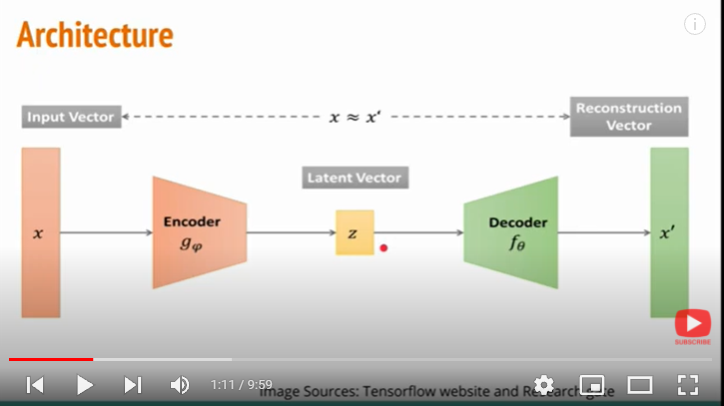

6.2 Auto Encoder for Anomaly detection

In [ ]:
# Data to consider
!wget http://www.timeseriesclassification.com/Downloads/ECG5000.zip
!unzip ECG5000.zip
!ls -alrt
!cat ECG5000_TRAIN.txt ECG5000_TEST.txt > ecg_final.txt
!head ecg_final.txt
df=pd.read_csv('ecg_final.txt', sep='  ', header=None)
df = df.add_prefix('c')

In [ ]:
df.columns

__init__ (self,df) : constructor of the class

data_split (self) : prepare the train data and test .. ( As a quick remark here we don't need the labels it is a Unsupervised method ) 

data_scaling_fit (self,scaler) : a function to scale the data

data_scaling_transform (self) : part two of the scale 

data_anomaly_normal_split (self) : a function to split the data on 4 parts train_normal , train_anomaly , test_normal , test_anomaly 

In [ ]:
class Data_prepare () : 
  def __init__ (self,df) : 
    self.df  = df
  def data_split (self) : 
    self.train_data, self.test_data, _1 , _2 = train_test_split(self.df.values, self.df.values[:,0:1], test_size=0.2, random_state=111)
  def data_scaling_fit (self,scaler) : 
    self.data_scaled = scaler.fit(self.train_data)
  def data_scaling_transform (self) : 
    self.train_data_scaled = self.data_scaled.transform(self.train_data)
    self.test_data_scaled = self.data_scaled.transform(self.test_data)
  def data_anomaly_normal_split (self) : # Train data wala fiha normal w anomaly w test data kifkif fiha normal w fiha anomaly .....
    self.normal_train_data= pd.DataFrame(self.train_data_scaled).add_prefix('c').query('c0 == 0').values[:,1:]
    self.anomaly_train_data = pd.DataFrame(self.train_data_scaled).add_prefix('c').query('c0 > 0').values[:,1:]
    self.normal_test_data= pd.DataFrame(self.test_data_scaled).add_prefix('c').query('c0 == 0').values[:,1:]
    self.anomaly_test_data = pd.DataFrame(self.test_data_scaled).add_prefix('c').query('c0 > 0').values[:,1:]
  

In [ ]:
data = Data_prepare (df)
data.data_split()
data.data_scaling_fit(scaler = MinMaxScaler())
data.data_scaling_transform()
data.data_anomaly_normal_split()


Here we will code an Auto Encoder with subclassing Tensorflow method .. Feel free to play with the architecture in order to get better performances .. Here i'm just making an exemple 

In [ ]:
class AutoEncoder(Model):
  def __init__(self):
    super(AutoEncoder, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Dense(64, activation="relu"),
      tf.keras.layers.Dense(32, activation="relu"),
      tf.keras.layers.Dense(16, activation="relu"),
      tf.keras.layers.Dense(8, activation="relu")]) 
    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(16, activation="relu"),
      tf.keras.layers.Dense(32, activation="relu"),
      tf.keras.layers.Dense(64, activation="relu"),
      tf.keras.layers.Dense(140, activation="sigmoid")])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [ ]:
model= AutoEncoder()
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=2,
                                                    mode='min')

model.compile(optimizer='adam', loss='mae')
# Rq : AutoEncoder hia Unsupervised Learning Technique ... ama model.fit() té5ou X,y .. y obligatoire .. héka aléh bch n3adiw
# normal_train_data martin .. on a pas besoin des labels !!!!!! Unsupervised approche !! 
history = model.fit(data.normal_train_data, data.normal_train_data, 
          epochs=50, 
          batch_size=128,
          validation_data=(data.train_data_scaled[:,1:], data.train_data_scaled[:,1:]),# Question : 3léh validation data haka 
          # voir environ minute 18
          shuffle=True, # dans le cas ou on considére data mté3na Time series lézm shuffle = False hna elle considéré data
          # 3adia .. héka aléh hat True
          callbacks=[early_stopping])


In [ ]:
reconstructions = model.predict(data.normal_test_data) 
train_loss = tf.keras.losses.mae(reconstructions, data.normal_test_data)
plt.hist(train_loss, bins=50)

In [ ]:
def Threshold (train_loss) : 
  threshold = np.mean(train_loss) + 2*np.std(train_loss)
  return threshold

In [ ]:
threshold = Threshold (train_loss)

In [ ]:
reconstructions_a = model.predict(data.anomaly_test_data) 
train_loss_a = tf.keras.losses.mae(reconstructions_a, data.anomaly_test_data)
plt.hist(train_loss_a, bins=50)


In [ ]:
# hna khat héka séprateur bin anomaly w normal data 
def anomaly_normal_plot(train_loss,train_loss_a) : 
  plt.hist(train_loss, bins=50, label='normal')
  plt.hist(train_loss_a, bins=50, label='anomaly')
  plt.axvline(threshold, color='r', linewidth=3, linestyle='dashed', label='{:0.3f}'.format(threshold))
  plt.legend(loc='upper right')
  plt.show()

In [ ]:
anomaly_normal_plot(train_loss,train_loss_a)

In [ ]:
def model_accuracy (train_loss,train_loss_a , threshold) : 
  accuracy_healthy = (tf.math.count_nonzero(tf.math.less(train_loss, threshold)).numpy() ) / len(train_loss)
  accuracy_unhealthy = (tf.math.count_nonzero(tf.math.greater(train_loss_a, threshold)).numpy() ) / len(train_loss)
  return accuracy_healthy , accuracy_unhealthy 

In [ ]:
accuracy_healthy , accuracy_unhealthy  = model_accuracy (train_loss,train_loss_a , threshold)
print ('The accuracy of predicting the healthy cardiac' , accuracy_healthy)
print ('The accuracy of predicting the unhealthy cardiac' , accuracy_unhealthy)


7. Auto Time Series 

When you create a predictor, you can either choose AutoML to let Amazon Forecast optimize the predictor for you, or you can manually choose a Forecast algorithm for your predictor. When you use AutoML, Forecast trains different models with your target time series, related time series, and item metadata. It then uses the model with the best accuracy metrics.

By default, Forecast evaluates predictors by averaging the Weighted Quantile Losses (wQL) of the 0.1 (P10), 0.5 (P50), and 0.9 (P90) quantiles. If you specify custom Forecast Types, Forecast uses the average losses of those forecast types. If you are using multiple backtest windows, Forecast uses the averages across all backtest windows. For hyperparameter optimization (HPO), Forecast uses the first backtest window to find the optimal hyperparameter values.

Unless you are certain that you want to use a specific algorithm to train a predictor, we recommend that you use AutoML. AutoML is more versatile and generally results in a more accurate predictor.

In [ ]:
# Data to consider 
df = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv', parse_dates = [['year', 'month', 'day', 'hour']],date_parser=convert_to_date, keep_date_col=True)
df = df [['year_month_day_hour','PM10','PM2.5']]
df.fillna(5,inplace=True)

__init__ (self,df) : Constructor of the class 

model (self,score_type,time_interval,non_seasonal_pdq,seasonality,model_type) : Construct the AutoMLmodel 

split_data (self,timestamp,condition_1,condition_2) : function to split the data into train and test based on  two conditions on the timestamp

fitting (self,ts_column,target) : fit the data 

cv_scores (self) : Perform cross validation on the different models in order to select the best one

results (self) : return a dictionnary containing all the results 

leader_board (self) : return a leader board in order to choose the best model 

predict (self)  : Perform the predictions 

In [ ]:
class Auto_TS () : 
  def __init__ (self,df) : 
    self.df = df 
  def model (self,score_type,time_interval,non_seasonal_pdq,seasonality,model_type) : 
    self.model = auto_timeseries(score_type=score_type, time_interval=time_interval, non_seasonal_pdq=non_seasonal_pdq, seasonality=seasonality, model_type=model_type, verbose=2)
  def split_data (self,timestamp,condition_1,condition_2) : 
    self.train=self.df[(self.df[timestamp] >= condition_1 ) & (self.df[timestamp] <= condition_2)]
    self.test=self.df[(self.df[timestamp] > condition_2 )]
  def fitting (self,ts_column,target) : 
    self.model.fit(traindata=self.train, ts_column=ts_column, target=target, cv=3)
  def cv_scores (self) : 
    scores = self.model.get_cv_scores() 
    return scores 
  def results (self) : 
    results_dict = model.get_ml_dict()
    return results_dict
  def leader_board (self) : 
    leaderboard = self.model.get_leaderboard()
    return leaderboard
  def predict (self) : 
    predict = self.model.predict(self.test)
    return predict 


In [ ]:
# Auto_ML = Auto_TS(df) 
# Auto_ML.model(score_type='rmse', time_interval='M', non_seasonal_pdq=(2,1,2), seasonality=True, model_type=['best'])
# Auto_ML.split_data ('year_month_day_hour','2012-01-01','2016-01-01')
# Auto_ML.fitting('year_month_day_hour','PM10')


In [ ]:
# scores = Auto_ML.cv_scores()
# results = Auto_ML.results()
# leaderboard = Auto_ML.leader_board()
# prediction = Auto_ML.predict()

8. Reinforcement Learning Approches 

In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/Reinforcement-Learning-for-Trading-main/Reinforcement-Learning-for-Trading-main/data/gmedata.csv')
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)


In [ ]:
# class RL_Forecasting () : 
#   def __init__(self,df) : 
#     self.df = df 
#   def environnement (self,environnement,frame_bound,window_size) : 
#     self.env = gym.make(environnement, df=self.df, frame_bound=frame_bound, window_size=window_size)
#   def build_environnement (self) : 
#     state = self.env.reset()
#     while True: 
#         action = self.env.action_space.sample()
#         n_state, reward, done, info = self.env.step(action)
#         if done: 
#             print("info", info)
#             break
            
#     plt.figure(figsize=(15,6))
#     plt.cla()
#     env.render_all()
#     plt.show()
#   def vectorizing_environnement (self,vectorizer) : 
#     self.env = vectorizer([lambda: self.env]) # vectorizer l'environnement 
#   def Agent_builder (self,policy) : # najmo na3mlo Extention mch bétharoura A2C
#     self.agent = A2C(policy, self.env, verbose=1) 
#   def model_fit (self,total_timesteps) : 
#     self.agent.learn(total_timesteps=total_timesteps)
#   def evaluation (self) : 
#     obs = self.env.reset()
#     while True: 
#         obs = obs[np.newaxis, ...]
#         action, _states = self.agent.predict(obs)
#         obs, rewards, done, info = self.env.step(action)
#         if done:
#             print("info", info)
#             break
#     plt.figure(figsize=(15,6))
#     plt.cla()
#     env.render_all()
#     plt.show() 

In [ ]:
# rl_object = RL_Forecasting(df)
# rl_object.environnement('stocks-v0',(5,100),5)
# rl_object.build_environnement()
# rl_object.vectorizing_environnement(DummyVecEnv)
# rl_object.Agent_builder('MlpLstmPolicy')
# rl_object.model_fit(1000)
# rl_object.evaluation()

9. Classic Machine learning Approches 

One approch that may be efficient to use is to see the forecasting problem as a classic regression problem . The problem here is that in the classic approches the data set are assumped as iid (independent and identically distrbuted ) . Unlike the forecasting problems where we have dependence between the different observations . So here we risk that our models don't capture the trend / seasonality etc .... But it seems challanging to try this kind of approches .. Let's get more in detail

9.0 Imports

In [ ]:
!pip install optuna

In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
import optuna 

9.1 Utils

here we have just a function to load the data .. nothing special 

In [ ]:
def load (path) : 
  df = pd.read_csv(path)
  return df

In [ ]:
df = load('../input/oil-price-prediction/Total_Data.csv') # if you want to work with flatten data 
df.head()

The data to consider here is about predicting the Brent Oil Price $ from the total_production , imports , total exports , intake 

9.2 Filling_Nans

Here a standard function to verify is there any missing value

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
def missing_values(df): 
  total = df.isnull().sum().sort_values(ascending=False)
  percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
  missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
  f, ax = plt.subplots(figsize=(15, 6))
  plt.xticks(rotation='90')
  sns.barplot(x=missing_data.index, y=missing_data['Percent'])
  plt.xlabel('Features', fontsize=15)
  plt.ylabel('Percent of Missing Values', fontsize=15)
  plt.title('Percentage of Missing Data by Feature', fontsize=15)
  # missing_data.head()
  return (missing_data)

In [ ]:
_  = missing_values(df) # Clean data 

9.3  Preprocess 

Here we get into the preprocess of the data we are going to remove the constant & unuseful features 

In [ ]:
# from sklearn.feature_selection import VarianceThreshold
# def constant_features (df,threshold) :  #threshold : paramétre ta3 variance .... 
#     sel = VarianceThreshold(threshold=threshold)
#     sel.fit(df)  # fit finds the features with zero variance
#     to_drop = [x for x in df.columns if x not in df.columns[sel.get_support()]]
#     return to_drop 

In [ ]:
# to_drop = constant_features (df,0) # constant features 


In [ ]:
# def Unuseful_features(df):  
#   df.drop('Unnamed: 0',axis=1,inplace=True)
#   df.drop(to_drop,axis=1,inplace=True)
#   return df 

In [ ]:
# df = Unuseful_features(df)

In [ ]:
# from sklearn.model_selection import train_test_split
# def split(df):
#   train, test = train_test_split(df, test_size=0.2, random_state=25)
#   return train,test

In [ ]:
# train,test = split(df)

9.4 Modeling

9.4.1 GridSearchCV

The GridSearchCV here serve to to tune the params of our model . We perform a full search on the best combinaison between different params . 

In [ ]:
# import xgboost as xgb
# from sklearn.model_selection import GridSearchCV

# model = xgb.XGBRegressor()
# parameters = {'depth'         : [3,4,5,6], 
#                   'learning_rate' : [0.05, 0.1 , 0.15],      # les paramétres li t7éb tlawéj 3la a7san combinaison binéthom
#                   'iterations'    : [100 , 200 , 500 ]
#                  }
# cv = 2, 
# n_jobs=-1

In [ ]:
# import numpy as np
# import pandas as pd
# from tqdm import tqdm
# from sklearn.model_selection import GridSearchCV
# class GridSearch :
#   def __init__(self,train,test,target) :
#     self.data = train
#     self.X_train = train.drop(target,axis=1)
#     self.y_train = train[target]
#     self.X_test , self.y_test = test.drop(target ,axis=1) , test[target]
#   def model (self,model) :
#     self.model = model
#   def parameters (self, parameters) :
#     self.parameters = parameters
#   def GridSearch (self) :
#     self.grid = GridSearchCV(estimator=self.model, param_grid = self.parameters, cv = 5, n_jobs=-1)
#   def Gridfit (self) :
#     self.grid.fit((self.X_train),(self.y_train))
#   def finalfit (self) :
#     self.grid.best_estimator_.fit((self.X_train),(self.y_train))
#   def predict(self):
#     self.pred = self.grid.best_estimator_.predict((self.X_test))
#     return (self.pred)
#   def score(self):
#     self.score = mean_absolute_error(self.y_test,self.pred)
#     return self.score

In [ ]:
# def Full_prediction_process () : 
#   gridsearch = GridSearch(train,test,'Brent Oil Price $')
#   gridsearch.model(model)
#   gridsearch.parameters(parameters)
#   gridsearch.GridSearch()
#   gridsearch.Gridfit()
#   gridsearch.finalfit()
#   prediction = gridsearch.predict()
#   print ('The overall error is about ',gridsearch.score() )

In [ ]:
# You can check it by your self i desactivate in order to get more rapid kernel
# import warnings
# warnings.filterwarnings('ignore')
# if __name__ == "__main__": 
#   Full_prediction_process () 

9.4.2 Optuna

Hyperparameters optimization is an integral part of working on data science projects. But the more parameters we have to optimize, the more difficult it is to do it manually. To speed up project development, we may want to automate this work.

In this part, we will explore Optuna. It is an open-source framework for efficient and automatic hyperparameter optimization. We will take a closer look at its components and optimization methods.

In [ ]:
# def optuna_split(df,column):
#   data = df.drop(column,axis=1) 
#   y = df[column]
#   return data , y 

In [ ]:
# data , y = optuna_split(df,'Brent Oil Price $')

In [ ]:
# from sklearn.metrics import mean_squared_error
# import xgboost as xgb
# def objective(trial,data=data,target=y):
    
#     train_x, test_x, train_y, test_y = train_test_split(data , target, test_size=0.15,random_state=42)
#     param = {
#         'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
#         'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
#         'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
#         'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
#         'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.009,0.01,0.012,0.014,0.016,0.018, 0.02,0.05,0.1,0.5]),
#         'n_estimators': 4000,
#         'max_depth': trial.suggest_categorical('max_depth', [5,7,9,11,13,15,17,20]),
#         'random_state': trial.suggest_categorical('random_state', [24, 48,2020]),
#         'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
#     }
#     model = xgb.XGBRegressor(**param)  
    
#     model.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=100,verbose=False)
    
#     preds = model.predict(test_x)
    
#     rmse = mean_squared_error(test_y, preds,squared=False)
    
#     return rmse

In [ ]:
# import warnings
# warnings.filterwarnings('ignore')
# def optimizing_process () : 
#   study = optuna.create_study(direction='minimize')
#   study.optimize(objective, n_trials=50)
#   print('Number of finished trials:', len(study.trials))
#   print('Best trial:', study.best_trial.params)
#   return study.best_trial.params

In [ ]:
# best_trial = optimizing_process()
# best_trial = {'lambda': 0.003080373437108122, 'alpha': 0.0549978720799555, 'colsample_bytree': 0.7, 'subsample': 0.8, 'learning_rate': 0.1,'max_depth': 5, 'random_state': 24, 'min_child_weight': 3}


In [ ]:
# def final_split(data,y) : 
#   X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2,random_state=42)
#   return X_train, X_test, y_train, y_test
# X_train, X_test, y_train, y_test = final_split(data,y)

In [ ]:
# def best_model(best_trial):
#   model = xgb.XGBRegressor(**best_trial)  
#   return model
# model = best_model(best_trial)
# def best_model_fit(model , X_train, X_test, y_train, y_test) : 
#   model.fit(X_train,y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=100,verbose=False)
#   return model 
# model = best_model_fit(model , X_train, X_test, y_train, y_test)
# def predict(model) : 
#   y_pred = model.predict(X_test)
#   return y_pred 
# y_pred = predict(model)

In [ ]:
# from sklearn.metrics import mean_absolute_error
# mean_absolute_error(y_test, y_pred)

9.4.3 KFold

Normally in a machine learning process, data is divided into training and test sets; the training set is then used to train the model and the test set is used to evaluate the performance of a model. However, this approach may lead to variance problems. In simpler words, a variance problem refers to the scenario where our accuracy obtained on one test is very different to accuracy obtained on another test set using the same algorithm.

The solution to this problem is to use K-Fold Cross-Validation for performance evaluation where K is any number. The process of K-Fold Cross-Validation is straightforward. You divide the data into K folds. Out of the K folds, K-1 sets are used for training while the remaining set is used for testing. The algorithm is trained and tested K times, each time a new set is used as testing set while remaining sets are used for training. Finally, the result of the K-Fold Cross-Validation is the average of the results obtained on each set.

In [ ]:
# remove_features = ['Brent Oil Price $']
# def features_utils (train):
#   features_columns = [col for col in train.columns if col not in remove_features]
#   return features_columns

In [ ]:
# columns =  features_utils (train)
# Best_trial = {'lambda': 0.003080373437108122, 'alpha': 0.0549978720799555, 'colsample_bytree': 0.7, 'subsample': 0.8, 'learning_rate': 0.1,'max_depth': 5, 'random_state': 24, 'min_child_weight': 3}


In [ ]:
# from sklearn.model_selection import KFold
# import numpy as np
# import xgboost as xgb
# from sklearn.metrics import mean_absolute_error
# def KFold_train(train,test,target) : 
#   preds = np.zeros(test.shape[0])
#   kf = KFold(n_splits=5,shuffle=False)
#   rmse=[]  # list contains rmse for each fold
#   n=0
#   for trn_idx, test_idx in kf.split(train[columns],train[target]):
#       X_tr,X_val=train[columns].iloc[trn_idx],train[columns].iloc[test_idx]
#       y_tr,y_val=train[target].iloc[trn_idx],train[target].iloc[test_idx]
#       model = xgb.XGBRegressor(**Best_trial)
#       model.fit(X_tr,y_tr,eval_set=[(X_val,y_val)],early_stopping_rounds=100,verbose=False)
#       preds+=model.predict(test[columns])/kf.n_splits
#       rmse.append(mean_absolute_error(y_val, model.predict(X_val)))
#       print(n+1,rmse[n])
#       n+=1
#   return preds

In [ ]:
# preds = KFold_train(train,test,'Brent Oil Price $')

In [ ]:
# from sklearn.metrics import mean_absolute_error
# mean_absolute_error(test['Brent Oil Price $'], preds)

10 . Graph Neural Networks 

Graph neural network (GNN) is an active frontier of deep learning, with a lot of applications, e.g., traffic speed/time prediction and recommendation system. In this Notebook, we will build our first GNN model to Epidemiological Forecasting
. We will run a spatio-temporal GNN model with example code from dgl library.

In [ ]:
# !pip install torch-scatter -f https://pytorch-geometric.com/whl/torch-1.9.0+${CUDA}.html
# !pip install torch-sparse -f https://pytorch-geometric.com/whl/torch-1.9.0+${CUDA}.html
# !pip install torch-cluster -f https://pytorch-geometric.com/whl/torch-1.9.0+${CUDA}.html
# !pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-1.9.0+${CUDA}.html
# !pip install torch-geometric
# !pip install torch-geometric-temporal

In the next steps we will define the recurrent graph neural network architecture used for solving the supervised task. The constructor defines a DCRNN layer and a feedforward layer. It is important to note that the final non-linearity is not integrated into the recurrent graph convolutional operation. This design principle is used consistently and it was taken from PyTorch Geometric. Because of this, we defined a ReLU non-linearity between the recurrent and linear layers manually. The final linear layer is not followed by a non-linearity as we solve a regression problem with zero-mean targets.

PS : Just for the purpose of having a quick notebook and not a slow one and because the notebook is too long i will cancel this code because the install of pytorch geometric the framework on which we are working is extremly slow . Thank you very much for being comprehensive 

In [ ]:
# from torch_geometric_temporal.dataset import ChickenpoxDatasetLoader
# from torch_geometric_temporal.signal import temporal_signal_split
# from tqdm import tqdm

In [ ]:
# class CFG : 
#   loader = ChickenpoxDatasetLoader()
#   node_features = 4 
#   lr = 0.01 


In [ ]:
# import torch
# import torch.nn.functional as F
# from torch_geometric_temporal.nn.recurrent import DCRNN

# class RecurrentGCN(torch.nn.Module):
#     def __init__(self, node_features):
#         super(RecurrentGCN, self).__init__()
#         self.recurrent = DCRNN(node_features, 32, 1)
#         self.linear = torch.nn.Linear(32, 1)

#     def forward(self, x, edge_index, edge_weight):
#         h = self.recurrent(x, edge_index, edge_weight)
#         h = F.relu(h)
#         h = self.linear(h)
#         return h

In [ ]:
# class GNN () : 

#   def __init__(self,loader) : 
#     self.loader = loader 
#   def  getting_data_set (self) : 
#     self.dataset = self.loader.get_dataset()
#   def getting_train_test (self) : 
#     self.train_dataset, self.test_dataset = temporal_signal_split(self.dataset, train_ratio=0.2)
#   def model (self,node_features) : 
#     self.model = RecurrentGCN(node_features = node_features)
#   def optimizer (self,lr) : 
#     self.optimizer = torch.optim.Adam(self.model.parameters(), lr=lr)
#   def train () : 
#     self.model.train()
#     for epoch in tqdm(range(200)):
#         cost = 0
#         for time, snapshot in enumerate(self.train_dataset):
#             y_hat =self.model(snapshot.x, snapshot.edge_index, snapshot.edge_attr)
#             cost = cost + torch.mean((y_hat-snapshot.y)**2)
#         cost = cost / (time+1)
#         cost.backward()
#         self.optimizer.step()
#         self.optimizer.zero_grad()

11. Apach Spark

All the cases that we was about to prepare where for Univariate Time Series ... Now let's extend a bit and go for the multivariate Time Series using Apach Spark and Facebook Prophet 

Based on how much upvote and comments I get i will continue to comment this notebook ... If I get at least Silver medal . I need you support . 

In [ ]:
# !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null 
# import os
# os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"  
# !update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java

In [ ]:
# !java -version
# !pip install pyspark
# !pip install pyarrow==0.15.1
# !pip install fbprophet


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

from fbprophet import Prophet

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

# from pyspark.sql import SparkSession
# import pyspark
# from pyspark.sql.types import *

# result_schema =StructType([
#   StructField('ds',TimestampType()),
#   StructField('store_id',IntegerType()),
#   StructField('y',DoubleType()),
#   StructField('yhat',DoubleType()),
#   StructField('yhat_upper',DoubleType()),
#   StructField('yhat_lower',DoubleType())
#   ])

In [ ]:
# # Data To consider
# df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/weekly_sales_data.csv')
# df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
# df = df.set_index('date')


In [ ]:
# class Apach_Spark () : 
#   def __init__ (self,df) : 
#     self.df = df
#     self.spark = SparkSession.builder.master('local').getOrCreate()
#   def create_data_frame(self) : 
#     self.sdf = self.spark.createDataFrame(self.df)
#   def print_schema (self) : 
#     self.sdf.printSchema()
#   def counting (self) : 
#     self.sdf.count()
#   def groupby  (self) : 
#     self.sdf.select(['store_id']).groupBy('store_id').agg({'store_id':'count'}).show()
#   def temp_view (self) : 
#     self.sdf.createOrReplaceTempView("sales")
#   def count_store (self) : 
#     self.spark.sql("select store_id, count(*) from sales group by store_id order by store_id").show()
#   def prepare_ds_y (self,sql) : 
#     self.spark.sql(sql).show()
#   def get_paritions (self) : 
#     num = self.sdf.rdd.getNumPartitions()
#     return num 
#   def store_part (self,sql) : 
#     self.store_part = (self.spark.sql( sql ).repartition(self.spark.sparkContext.defaultParallelism, ['store_id'])).cache()
#   def explain (self) : 
#     explain = self.store_part.explain()
#     return explain



In [ ]:
# sql = 'SELECT store_id, date as ds, sum(sales) as y FROM sales GROUP BY store_id, ds ORDER BY store_id, ds'

# apach = Apach_Spark(df) 
# apach.create_data_frame()
# apach.print_schema()
# apach.counting()
# apach.groupby()
# apach.temp_view()
# apach.count_store()
# # apach.prepare_ds_y(sql)
# num = apach.get_paritions()
# # apach.store_part(sql)
# # explain = apach.explain()

Upvote me .. And i'll finish the comments and code ... 
Have a nice day

In [ ]:
# from pyspark.sql.functions import pandas_udf, PandasUDFType

# @pandas_udf( result_schema, PandasUDFType.GROUPED_MAP )
# def forecast_sales( store_pd ):

#   model = Prophet(interval_width=0.95,seasonality_mode = 'multiplicative', weekly_seasonality=True, yearly_seasonality=True)

#   model.fit( store_pd )

#   future_pd = model.make_future_dataframe(
#     periods=5, 
#     freq='w'
#     )
  
#   forecast_pd = model.predict( future_pd )  
  
#   f_pd = forecast_pd[ ['ds','yhat', 'yhat_upper', 'yhat_lower'] ].set_index('ds')
  
#   st_pd = store_pd[['ds','store_id','y']].set_index('ds')
  
#   results_pd = f_pd.join( st_pd, how='left' )
#   results_pd.reset_index(level=0, inplace=True)
  
#   results_pd['store_id'] = store_pd['store_id'].iloc[0]

#   return results_pd[ ['ds', 'store_id','y', 'yhat', 'yhat_upper', 'yhat_lower'] ]

In [ ]:
# from pyspark.sql.functions import current_date

# results = (
#   store_part
#     .groupBy('store_id')
#     .apply(forecast_sales)
#     .withColumn('training_date', current_date() )
#     )
# final_df = results.toPandas()
# final_df=final_df.set_index('ds')


In [ ]:
# final_df.query('store_id==44')[['y','yhat']].plot()
